# 1 游戏设置

- 打开游戏 《只狼：影逝二度》
    - 设定
        - 显示和声音
            - **亮度调整**
                - 设置 5
        - 按键设置
            - 移动
                - 移动 前
                    - 设置 W
                - 移动 后
                    - 设置 S
                - 移动 左
                    - 设置 A
                - 移动 右
                    - 设置 D
                - 垫步、（长按）冲刺
                    - 设置 .Shift
                - 跳跃
                    - 设置 Space
            - 视角操作
                - 重置视角/固定目标
                    - 设置 Y
            - 攻击动作
                - **攻击**
                    - 设置 J
                - **防御**
                    - 设置 K
        - 图像设定
            - **屏幕模式**
                - 窗口
            - **屏幕分辨率**
                - 1280 x 720
            - 自动绘图调整
                - OFF
            - 质量设定
                - 低

### 校准游戏窗口位置

- 将游戏窗口放在左上方  
![example_01.png](https://github.com/ricagj/pysekiro_with_RL/blob/main/imgs/example_01.png?raw=true?raw=true)

运行以下代码，然后根据弹出来的窗口调整游戏窗口的位置

In [ ]:
from pysekiro.adjustment import main

main()

- 当提示 Ready! 后
    - 按 T 开始
    - 按 P 结束

![adjustment.png](https://github.com/ricagj/pysekiro_with_RL/blob/main/imgs/adjustment.png?raw=true)

# 2 开始

### 2.1 用深度学习从已有的数据中学习

##### 2.1.1 收集数据

1. 建议使用《只狼：影逝二度》v1.06版本
2. 建议通过鬼佛处“再战稀世强者”收集数据
3. 建议在战斗开始时开始搜集数据，战斗结束时停止，保证每一个数据集都是一场完整的战斗。

- 以下是收集“苇名弦一郎”战斗数据的示例。
- 如果想收集其他Boss的战斗数据，那就把target改成对应的Boss的名字

Ready!
Starting!
                                                                                                    step:1645. Loop took  0.11 seconds. action:          O. 

Stop, please wait
The_battle_memory\Genichiro_Ashina\training_data-5.npy
Done!


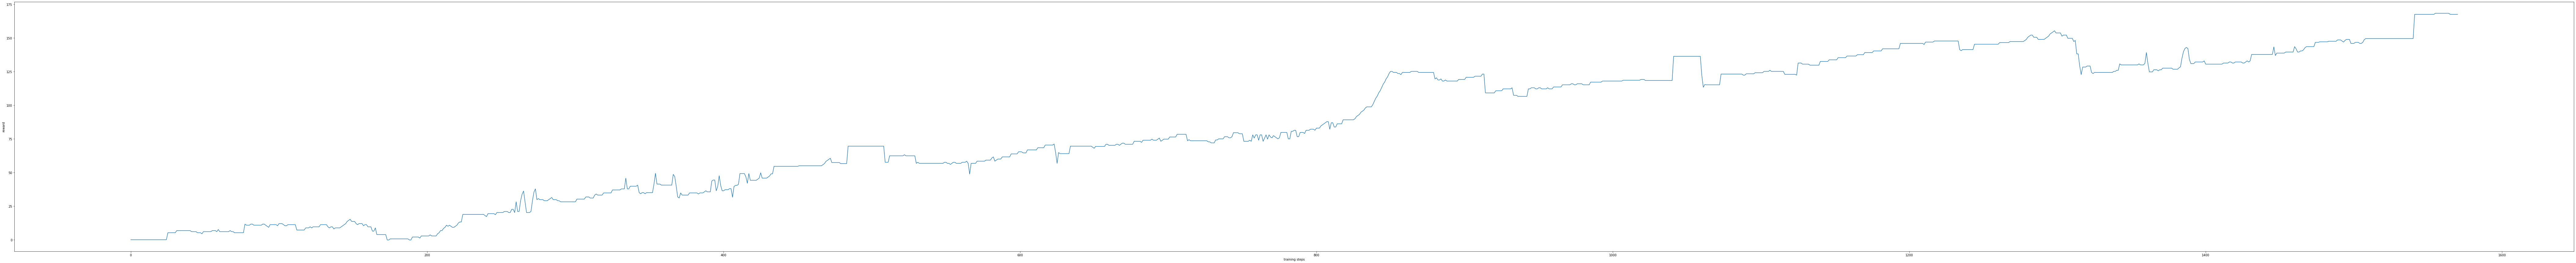

In [1]:
from pysekiro.collect_data import Data_collection
target = 'Genichiro_Ashina' # 苇名弦一郎
# target = 'Inner_Genichiro' # 心中的弦一郎
# target = 'Isshin,_the_Sword_Saint' # 剑圣一心
# target = 'Inner_Isshin' # 心中的一心
c = Data_collection(target)
c.collect_data()

- 当提示 Ready! 后
    - 按 T 开始
    - 按 P 结束

##### 2.1.2 训练模型

In [1]:
from pysekiro.train_with_dl import train

target = 'Genichiro_Ashina' # 苇名弦一郎

train(target, start=1, end=5)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 200, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 200, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 100, 200, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 100, 200, 16) 64          conv2d_1[0][0]                   
______________________________________________________________________________________________

##### 2.1.3 测试模型

In [ ]:
from learn_online import learn_online as test

test(model_weights='dl_weights.h5')

- 当提示 Ready! 后
    - 按 T 开始
    - 按 P 结束

### 2.2 用强化学习从零开始在实战中学习

- 注：如果选择这种方式，可能学习过程会较长

##### 2.2.1 在线学习

In [ ]:
from learn_online import learn_online

learn_online(save_path='Online_w.h5')

- 当提示 Ready! 后
    - 按 T 开始
    - 按 P 结束

##### 2.2.2 测试模型

In [ ]:
from learn_online import learn_online

learn_online(model_weights='Online_w.h5')

- 当提示 Ready! 后
    - 按 T 开始
    - 按 P 结束

### 2.3 用强化学习从已有的数据中学习，再在实战中继续学习

##### 2.3.1 离线学习

GeForce GTX 970M

 training_data-1.npy total: 1894

 step: 300, current_cumulative_reward:26.800, memory:301 


 step: 600, current_cumulative_reward:19.200, memory:601 


 step: 900, current_cumulative_reward:19.200, memory:901 


 step:1200, current_cumulative_reward:34.800, memory:1201 


 step:1500, current_cumulative_reward:72.400, memory:1501 


 step:1800, current_cumulative_reward:86.000, memory:1801 

 [summary] round:  1, current_cumulative_reward:108.000, memory:1893

 training_data-2.npy total: 1666

 step: 300, current_cumulative_reward:114.400, memory:2194 


 step: 600, current_cumulative_reward:114.200, memory:2494 


 step: 900, current_cumulative_reward:143.400, memory:2794 


 step:1200, current_cumulative_reward:190.000, memory:3094 


 step:1500, current_cumulative_reward:241.200, memory:3394 

 [summary] round:  2, current_cumulative_reward:269.400, memory:3558

 training_data-3.npy total: 1723

 step: 300, current_cumulative_reward:298.200, memory:3859 


 step: 

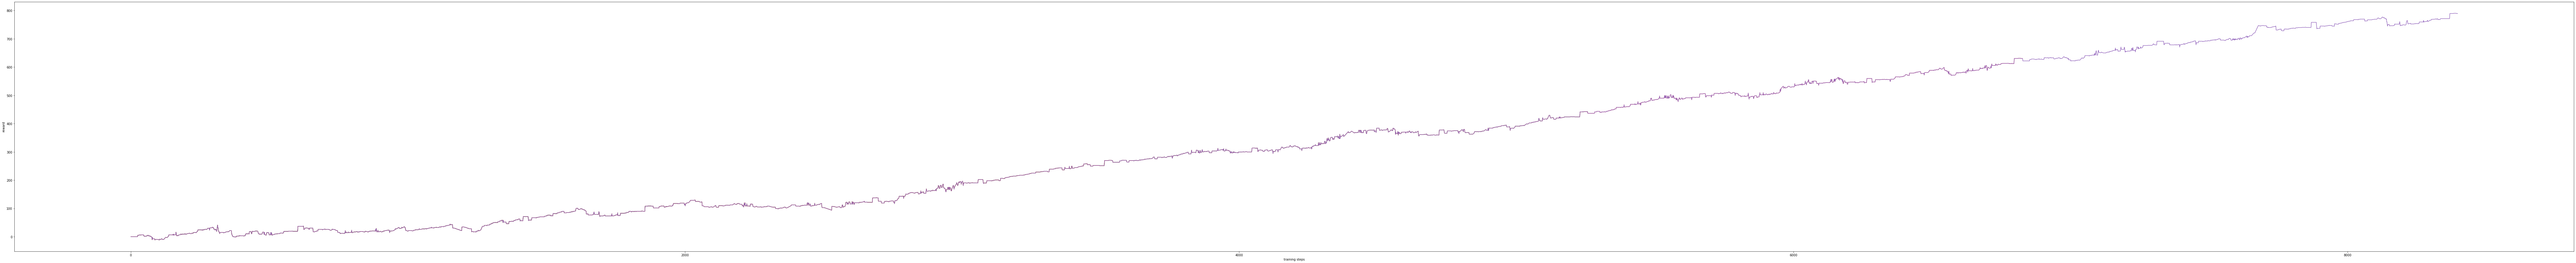

In [1]:
from learn_offline import learn_offline

target = 'Genichiro_Ashina' # 苇名弦一郎
learn_offline(target, start=1, end=5, save_path='offline_w.h5')

##### 2.3.2 在线学习

这里与前面的从零开始在线学习的区别是，读取了离线学习的模型权重

In [ ]:
from learn_online import learn_online

learn_online(model_weights='offline_w.h5', save_path='online_w.h5')

- 当提示 Ready! 后
    - 按 T 开始
    - 按 P 结束

##### 2.3.3 测试模型

In [ ]:
from learn_online import learn_online

learn_online(model_weights='online_w.h5')

- 当提示 Ready! 后
    - 按 T 开始
    - 按 P 结束